In [1]:
import pandas as pd

# Importar los datos
df = pd.read_csv("manufacturing_defect_dataset_OK .csv", sep=';', engine='python')

In [7]:
X = df.drop("DefectStatus", axis=1)
y = df["DefectStatus"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 6.7 MB/s eta 0:00:23
    --------------------------------------- 3.4/150.0 MB 8.4 MB/s eta 0:00:18
   - -------------------------------------- 5.5/150.0 MB 8.8 MB/s eta 0:00:17
   - -------------------------------------- 6.8/150.0 MB 8.4 MB/s eta 0:00:18
   -- ------------------------------------- 8.1/150.0 MB 7.6 MB/s eta 0:00:19
   -- ------------------------------------- 10.5/150.0 MB 8.2 MB/s eta 0:00:18
   --- ------------------------------------ 12.6/150.0 MB 8.4 MB/s eta 0:00:17
   --- ------------------------------------ 14.4/150.0 MB 8.5 MB/s eta 0:00:17
   ---- ----------------------------------- 16.3/150.0 MB 8.5 MB/s eta 0:00:16
   ---- ----------------------------------- 18.4/150.0 MB 8.6 MB/s eta 0:00:16
   ----- ---------------------------------- 20.2/150.0 MB 8.6 MB/s eta 0:00:16
   ----- ---------------------------------- 22.0/150.0 MB 8.6 MB/

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar modelo XGBoost con configuración por defecto

xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_modelo.predict(X_test)

# Evaluación
print("Evaluación - XGBoost")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


NameError: name 'xgb_model' is not defined

In [92]:
# Paso 4: Entrenar el modelo con hiperparámetros por defecto (limitado a 50 árboles)
xgb_default = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=50,  # limitar a 50 árboles para evaluación inicial
    random_state=42
)



xgb_default.fit(X_train, y_train)

# Paso 5: Realizar predicciones y evaluar
y_pred = xgb_default.predict(X_test)

# Paso 6: Mostrar resultados
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[ 75  28]
 [  5 540]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.94      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648



C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:37:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [80]:

from sklearn.metrics import make_scorer
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

xgb_modelo = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Paso 4: Definir el espacio de búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 10],
    'learning_rate': [0.01, 0.03],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.5, 1.0]
}

# Paso 5: Configurar validación cruzada y métrica
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, pos_label=0)  # F1-score para clase minoritaria

# Paso 6: Ejecutar búsqueda en rejilla
grid_search = GridSearchCV(
    estimator=xgb_modelo,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Paso 7: Ajustar modelo
grid_search.fit(X_train, y_train)

# Paso 8: Mostrar los mejores hiperparámetros y puntuación
print("Mejores hiperparámetros:")
print(grid_search.best_params_)
print("Mejor F1-score para clase 0:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores hiperparámetros:
{'colsample_bytree': 0.5, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mejor F1-score para clase 0: 0.8733412265048383


In [150]:
# Definir el modelo con los mejores hiperparámetros encontrados
best_xgb = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.03,
    max_depth=3,
    n_estimators=200,
    subsample=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

best_xgb.fit(
    X_train, y_train,)


# Predecir sobre el conjunto de test
y_pred = best_xgb.predict(X_test)
y_proba_bestxgb = best_xgb.predict_proba(X_test)[:, 1]
# Evaluar el rendimiento
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba_bestxgb))

Matriz de confusión:
[[ 75  28]
 [  4 541]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648

ROC-AUC: 0.8363765921439388


C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:37:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


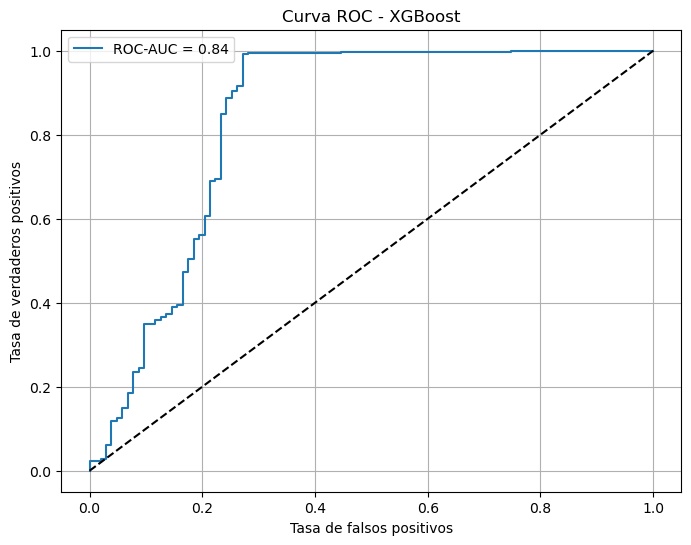

In [154]:

fpr, tpr, _ = roc_curve(y_test,y_proba_bestxgb)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_score(y_test, y_proba_bestxgb):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - XGBoost")
plt.legend()
plt.grid()
plt.show()


C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


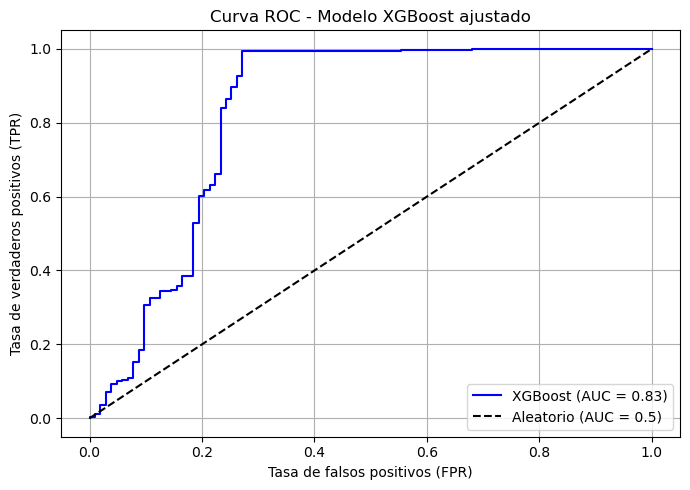

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Asegúrate de que X e y estén definidos con tus datos reales

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Definir y entrenar el modelo XGBoost ajustado
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=210,
    max_depth=4,
    learning_rate=0.066,
    subsample=0.827,
    colsample_bytree=0.546,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predecir probabilidades
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Dibujar curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_score(y_test, y_proba_xgb):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - XGBoost")
plt.legend()
plt.grid()
plt.show()


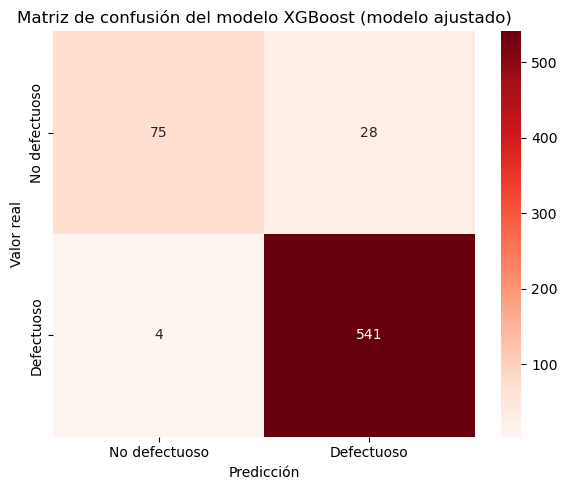

In [86]:
cm = confusion_matrix(y_test, y_pred)
labels = ['No defectuoso', 'Defectuoso']

# Dibujar la matriz
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión del modelo XGBoost (modelo ajustado)')
plt.tight_layout()
plt.show()

In [104]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Supón que ya tienes X e y definidos con tus datos reales

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Aplicar SMOTE sobre el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Entrenar modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_res, y_train_res)

# Predecir sobre el test original
y_pred = model.predict(X_test)

# Evaluar resultados
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

from xgboost import plot_importance
import matplotlib.pyplot as plt



C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Matriz de confusión:
[[ 75  28]
 [ 17 528]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       103
           1       0.95      0.97      0.96       545

    accuracy                           0.93       648
   macro avg       0.88      0.85      0.86       648
weighted avg       0.93      0.93      0.93       648



NotFittedError: need to call fit or load_model beforehand

In [96]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Calcular peso
scale = y_train.value_counts()[1] / y_train.value_counts()[0]  # defectuoso / no defectuoso

# Definir y entrenar el modelo con scale_pos_weight
xgb_weighted = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale
)

xgb_weighted.fit(X_train, y_train)

# Evaluación
y_pred = xgb_weighted.predict(X_test)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Matriz de confusión:
[[ 75  28]
 [  5 540]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.94      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648



In [100]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_es, X, y, scoring='f1', cv=cv)

print("F1-score medio:", scores.mean())



C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

F1-score medio: 0.9762162804895494


In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.5, 0.5)
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Mejores parámetros encontrados:")
print(random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:50:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros encontrados:
{'colsample_bytree': 0.5457188054057056, 'learning_rate': 0.06634976843721697, 'max_depth': 4, 'n_estimators': 210, 'subsample': 0.8266450307965869}


In [158]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modelo con los mejores parámetros obtenidos por RandomizedSearchCV
best_random_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.03,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Entrenar
best_random_model.fit(X_train, y_train)

# Predecir
y_pred = best_random_model.predict(X_test)
y_proba_xgb_best = best_random_model.predict_proba(X_test)[:, 1]

# Evaluar
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb_best))

Matriz de confusión:
[[ 75  28]
 [  4 541]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648

ROC-AUC: 0.8363765921439388


C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:25:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [114]:
!pip install optuna


In [115]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }

    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    score = cross_val_score(model, X, y, cv=3, scoring='f1_macro').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Mejores hiperparámetros:", study.best_params)


[I 2025-05-30 10:35:51,441] A new study created in memory with name: no-name-45c763fc-41fa-4871-8f34-1d11d6ad3411
C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:35:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:35:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:35:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-30 10:35:52,280] Trial 0 finished with value: 0.8944186197578464 and parameters: {'n_estimators': 207, '

Mejores hiperparámetros: {'n_estimators': 193, 'max_depth': 3, 'learning_rate': 0.022140481940617178, 'subsample': 0.9316716272298095, 'colsample_bytree': 0.9987968715677396}


In [146]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entrenar el modelo con los mejores parámetros de Optuna
best_xgb_optuna = XGBClassifier(
    n_estimators=133,
    max_depth=3,
    learning_rate=0.037,
    subsample=0.976,
    colsample_bytree=0.972,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

best_xgb_optuna.fit(X_train, y_train)

# Predicción
y_pred = best_xgb_optuna.predict(X_test)
y_proba_best_xgb = best_xgb_optuna.predict_proba(X_test)[:, 1]

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba_best_xgb))

Matriz de confusión:
[[ 75  28]
 [  4 541]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648

ROC-AUC: 0.8398681749354235


C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [142]:
# Reimportar librerías necesarias tras el reinicio
import pandas as pd
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

df = pd.read_csv("manufacturing_defect_dataset_OK .csv", sep=';', engine='python')
X = df.drop("DefectStatus", axis=1)
y = df["DefectStatus"]



# Separar clases
df_minority = df[df['DefectStatus'] == 0]
df_majority = df[df['DefectStatus'] == 1]

# Muestreo para igualar las clases
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Conjunto balanceado
df_balanced = pd.concat([df_minority, df_majority_downsampled])
X_bal = df_balanced.drop('DefectStatus', axis=1)
y_bal = df_balanced['DefectStatus']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

# Modelo XGBoost con hiperparámetros ajustados
model = XGBClassifier(
    n_estimators=133,
    max_depth=3,
    learning_rate=0.037,
    subsample=0.976,
    colsample_bytree=0.972,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
y_proba_ajustado = model.predict_proba(X_test)[:, 1]

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))
(conf_matrix, report)
print("ROC-AUC:", roc_auc_score(y_test, y_proba_ajustado))


Matriz de confusión:
[[77 27]
 [ 7 96]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       104
           1       0.78      0.93      0.85       103

    accuracy                           0.84       207
   macro avg       0.85      0.84      0.83       207
weighted avg       0.85      0.84      0.83       207

ROC-AUC: 0.8501680358476476


C:\Users\crist\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:22:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
